In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
response = requests.get(endpoint)

In [3]:
response

<Response [200]>

In [4]:
res = response.json()
res

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  


In [5]:
params={'year':2016,
       'query_text': 'fire'}

In [6]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
res = requests.get(endpoint, params=params)

In [7]:
res

<Response [200]>

In [8]:
res.json()

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [9]:
#converting to a dataframe and finding the max within the data frame
fire= pd.DataFrame(res.json())
fire
max_fire=fire[fire['query_count'] == fire['query_count'].max()]
max_fire

,month_name,year,query_count,query_text
7,August,2016,47,fire


2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 

In [36]:
#pulling all the data into a dataframe to filter it down. I couldn't get the api notation to work like I wanted, so I went this way.
#params={limit:5000}
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=48000'
res2 = requests.get(endpoint)
res2

<Response [200]>

In [37]:
over_100 = pd.DataFrame(res2.json())
over_100

,month_name,year,query_count,query_text,month
0,January,2014,223,ebid,NaN
1,January,2014,112,property maps,NaN
2,January,2014,97,maps,NaN
3,January,2014,90,property tax,NaN
4,January,2014,76,jobs,NaN
...,...,...,...,...,...
43672,July,2021,8,sign ordinance,7
43673,July,2021,8,snap,7
43674,July,2021,8,small business,7
43675,July,2021,8,water department,7


In [42]:
over_100['query_count']=pd.to_numeric(over_100['query_count'])
over_100.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43677 entries, 0 to 43676
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   month_name   43677 non-null  object 
 1   year         43677 non-null  object 
 2   query_count  43676 non-null  float64
 3   query_text   43677 non-null  object 
 4   month        15177 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [43]:
hundy=over_100[over_100['query_count']>100]
hundy

,month_name,year,query_count,query_text,month
0,January,2014,223.0,ebid,NaN
1,January,2014,112.0,property maps,NaN
501,February,2014,298.0,ebid,NaN
502,February,2014,185.0,property taxes,NaN
503,February,2014,140.0,maps,NaN
...,...,...,...,...,...
43194,July,2021,114.0,GIS,7
43195,July,2021,109.0,accident report,7
43196,July,2021,105.0,employment,7
43197,July,2021,103.0,trash pickup,7


1262 times this occured.

3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [81]:
params={'query_text':'codes'}
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count > 100'
res3 = requests.get(endpoint, params=params)
res3

<Response [200]>

In [82]:
codes=pd.DataFrame(res3.json())
codes

,month_name,year,query_count,query_text,month
0,September,2015,101,codes,NaN
1,April,2021,102,codes,4
2,August,2016,104,codes,NaN
3,November,2020,104,codes,11
4,December,2017,106,codes,NaN
5,May,2016,107,codes,NaN
6,April,2016,111,codes,NaN
7,July,2021,114,codes,7
8,January,2017,115,codes,NaN
9,May,2021,115,codes,5


Codes was searched over 100 times in 56 different months. This did not account for various cases of the word 'codes'

4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [35]:
params={'query_text':'maps'}
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'
res4 = requests.get(endpoint, params=params)
res4

<Response [200]>

In [156]:
#pulling the different versions of maps and combining them into one dataframe
maps = over_100.loc[over_100['query_text'] == 'maps']
maps2 = over_100.loc[over_100['query_text'] == 'MAPS']
maps3 = over_100.loc[over_100['query_text'] == 'Maps']
all_maps = pd.concat([maps,maps2,maps3])
#all_maps['date'] = pd.to_datetime(all_maps.month_name.astype(str) + '/' + all_maps.year.astype(str), format='%B/%Y')
all_maps_grouped=all_maps.groupby('month_name')['query_count'].agg(sum).reset_index(name='Query Count')
#arranging the months in the correct order courtesy of Elisia Nguyen
all_maps_grouped['Month']=pd.Categorical(all_maps_grouped['month_name'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [160]:
jan=maps[maps['month_name']=='January']
jan_count_sum = jan['query_count'].sum()
jan_count_sum

924.0

maps = pd.DataFrame(res4.json())
maps

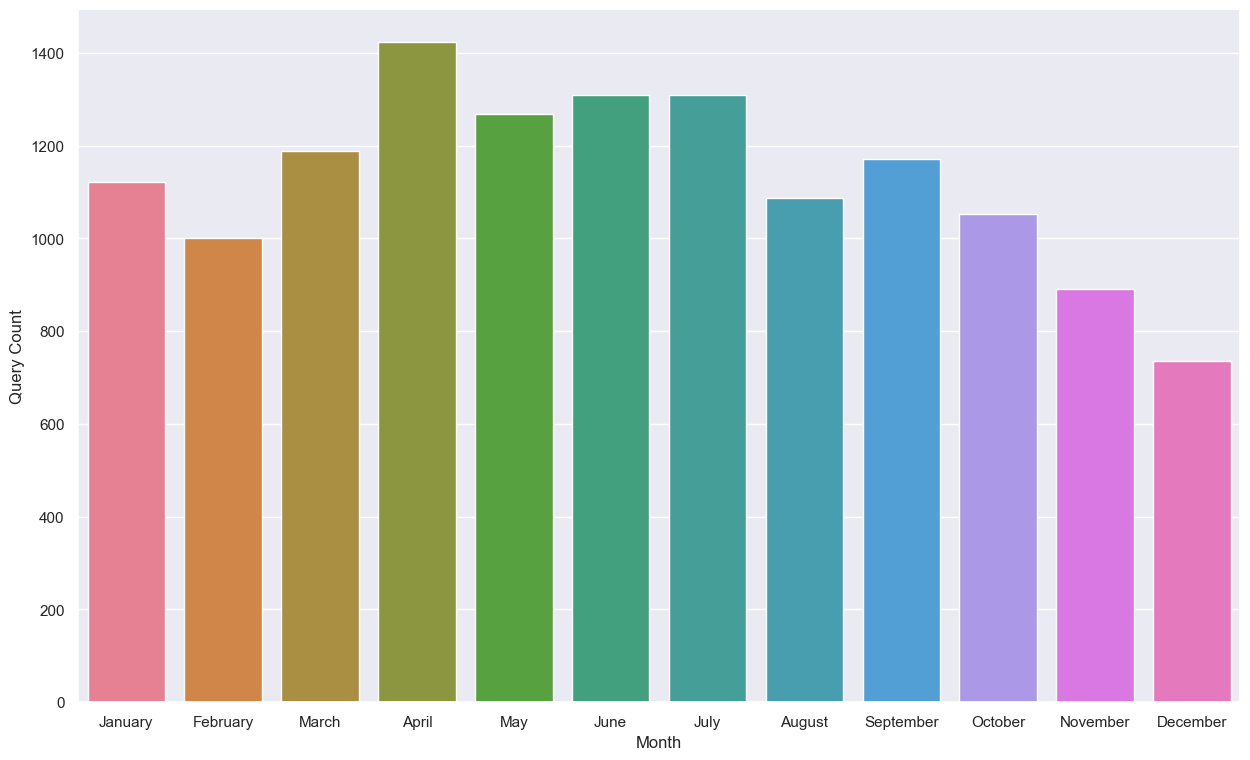

In [157]:
sns.barplot(x=all_maps_grouped['Month'],y=all_maps_grouped['Query Count'], errorbar=None, palette='husl')
sns.set(rc={'figure.figsize':(15,9)})